> For working in VSCode

In [ ]:
!pip install colabcode -q


     |████████████████████████████████| 745 kB 5.3 MB/s 
     |████████████████████████████████| 45 kB 3.1 MB/s 
     |████████████████████████████████| 8.3 MB 21.6 MB/s 
     |████████████████████████████████| 396 kB 32.5 MB/s 
     |████████████████████████████████| 58 kB 5.0 MB/s 
     |████████████████████████████████| 428 kB 30.7 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 78 kB 7.4 MB/s 
     |████████████████████████████████| 129 kB 58.5 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 125 kB 47.8 MB/s 
     |████████████████████████████████| 124 kB 56.9 MB/s 
     |████████████████████████████████| 124 kB 56.3 MB/s 
     |████████████████████████████████| 122 kB 58.9 MB/s 
     |████████████████████████████████| 122 kB 43.9 MB/s 
     |████████████████████████████████| 122 kB 47.6 MB/s 
     |████████████████████████████████| 122 kB 56.3 MB/s 
     |███████████████████

In [ ]:
from colabcode import ColabCode

In [ ]:
!ngrok authtoken 220r48qu3L8C2L2kmjpouQP3kny_dvVxwNKfGXZR4bAWaMmJ

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
ColabCode(port=10000, mount_drive=True)

Code Server can be accessed on: NgrokTunnel: "https://8917-35-190-147-104.ngrok.io" -> "http://localhost:10000"
Mounted at /content/drive
[2021-12-09T17:25:38.736Z] info  code-server 3.10.2 387b12ef4ca404ffd39d84834e1f0776e9e3c005
[2021-12-09T17:25:38.737Z] info  Using user-data-dir ~/.local/share/code-server
[2021-12-09T17:25:38.761Z] info  Using config file ~/.config/code-server/config.yaml
[2021-12-09T17:25:38.761Z] info  HTTP server listening on http://127.0.0.1:10000 
[2021-12-09T17:25:38.761Z] info    - Authentication is disabled 
[2021-12-09T17:25:38.761Z] info    - Not serving HTTPS 


# Installation of RDKit

In [ ]:
#@title
# Install rdkit
import sys
import os
import requests
import subprocess
import shutil
from logging import getLogger, StreamHandler, INFO
 
 
logger = getLogger(__name__)
logger.addHandler(StreamHandler())
logger.setLevel(INFO)
 
 
def install(
        chunk_size=4096,
        file_name="Miniconda3-latest-Linux-x86_64.sh",
        url_base="https://repo.continuum.io/miniconda/",
        conda_path=os.path.expanduser(os.path.join("~", "miniconda")),
        rdkit_version=None,
        add_python_path=True,
        force=False):
    """install rdkit from miniconda
    ```
    import rdkit_installer
    rdkit_installer.install()
    ```
    """
 
    python_path = os.path.join(
        conda_path,
        "lib",
        "python{0}.{1}".format(*sys.version_info),
        "site-packages",
    )
 
    if add_python_path and python_path not in sys.path:
        logger.info("add {} to PYTHONPATH".format(python_path))
        sys.path.append(python_path)
 
    if os.path.isdir(os.path.join(python_path, "rdkit")):
        logger.info("rdkit is already installed")
        if not force:
            return
 
        logger.info("force re-install")
 
    url = url_base + file_name
    python_version = "{0}.{1}.{2}".format(*sys.version_info)
 
    logger.info("python version: {}".format(python_version))
 
    if os.path.isdir(conda_path):
        logger.warning("remove current miniconda")
        shutil.rmtree(conda_path)
    elif os.path.isfile(conda_path):
        logger.warning("remove {}".format(conda_path))
        os.remove(conda_path)
 
    logger.info('fetching installer from {}'.format(url))
    res = requests.get(url, stream=True)
    res.raise_for_status()
    with open(file_name, 'wb') as f:
        for chunk in res.iter_content(chunk_size):
            f.write(chunk)
    logger.info('done')
 
    logger.info('installing miniconda to {}'.format(conda_path))
    subprocess.check_call(["bash", file_name, "-b", "-p", conda_path])
    logger.info('done')
 
    logger.info("installing rdkit")
    subprocess.check_call([
        os.path.join(conda_path, "bin", "conda"),
        "install",
        "--yes",
        "-c", "rdkit",
        "python==3.7.3",
        "rdkit" if rdkit_version is None else "rdkit=={}".format(rdkit_version)])
    logger.info("done")
 
    import rdkit
    logger.info("rdkit-{} installation finished!".format(rdkit.__version__))
 
 
if __name__ == "__main__":
    install()

add /root/miniconda/lib/python3.7/site-packages to PYTHONPATH
rdkit is already installed


In [ ]:
# Enforce pytorch version 1.6.0
import torch
if torch.__version__ != '1.6.0':
  !pip uninstall torch -y
  !pip uninstall torchvision -y
  !pip install torch==1.6.0
  !pip install torchvision==0.7.0

# Check pytorch version and make sure you use a GPU Kernel
!python -c "import torch; print(torch.__version__)"
!python -c "import torch; print(torch.version.cuda)"
!python --version
!nvidia-smi

Found existing installation: torch 1.10.0+cu111
Uninstalling torch-1.10.0+cu111:
  Successfully uninstalled torch-1.10.0+cu111
Found existing installation: torchvision 0.11.1+cu111
Uninstalling torchvision-0.11.1+cu111:
  Successfully uninstalled torchvision-0.11.1+cu111
     |████████████████████████████████| 748.8 MB 17 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 1.0.61 requires torchvision, which is not installed.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.6.0 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.6.0 which is incompatible.


     |████████████████████████████████| 5.9 MB 8.7 MB/s 
1.6.0
10.2
Python 3.7.12
Wed Dec  8 09:22:02 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
      

In [ ]:
import torch
pytorch_version = f"torch-{torch.__version__}+cu{torch.version.cuda.replace('.', '')}.html"
!pip install --no-index torch-scatter -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-sparse -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-cluster -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-spline-conv -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install torch-geometric

Looking in links: https://pytorch-geometric.com/whl/torch-1.6.0+cu102.html
     |████████████████████████████████| 2.9 MB 4.4 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.6.0+cu102.html
     |████████████████████████████████| 1.6 MB 1.6 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.6.0+cu102.html
     |████████████████████████████████| 1.1 MB 1.6 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.6.0+cu102.html
     |████████████████████████████████| 371 kB 1.6 MB/s 
     |████████████████████████████████| 325 kB 9.9 MB/s 
     |████████████████████████████████| 407 kB 48.1 MB/s 
     |████████████████████████████████| 45 kB 4.3 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.0.2-py3-none-any.whl size=535570 sha256=0f861afc49b157e3e1a13aaee58b4224901b7b024287c7efdfdf511b83db6ab0
  Stored in directory: /root/.cache/pip/wheels/3f/08/13/2321517088bb2e95bfd0e45033bb9c923189e5b2078e0be4ef
Successfully built torch-

# Dataset Part

In [ ]:
import rdkit
from torch_geometric.datasets import MoleculeNet
 
# Load the ESOL dataset
data = MoleculeNet(root=".", name="ESOL")
data

Processing...
Done!


ESOL(1128)

In [ ]:
print("Dataset type: ", type(data))
print("Dataset features: ", data.num_features)
print("Dataset target: ", data.num_classes)
print("Dataset length: ", data.len)
print("Dataset sample: ", data[0])
print("Sample  nodes: ", data[0].num_nodes)
print("Sample  edges: ", data[0].num_edges)

Dataset type:  <class 'torch_geometric.datasets.molecule_net.MoleculeNet'>
Dataset features:  9
Dataset target:  734
Dataset length:  <bound method InMemoryDataset.len of ESOL(1128)>
Dataset sample:  Data(x=[32, 9], edge_index=[2, 68], edge_attr=[68, 3], y=[1, 1], smiles='OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O ')
Sample  nodes:  32
Sample  edges:  68


In [ ]:
data[0]

Data(x=[32, 9], edge_index=[2, 68], edge_attr=[68, 3], y=[1, 1], smiles='OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O ')

In [ ]:
#edges in sparse COO format
data[0].edge_index.t()

In [ ]:
data[0]["smiles"]

'OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O '

In [ ]:

data[0].y

tensor([[-0.7700]])

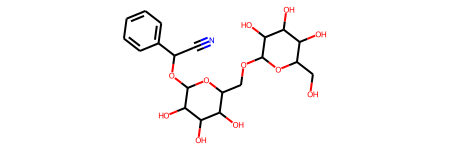

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
molecule = Chem.MolFromSmiles(data[0]["smiles"])
molecule

> different learning problems (node, edge or graph prediction) require different GNN architectures.

For example for node-level prediction you will often encounter masks. For graph-level predictions on the other hand you need to combine the node embeddings.

In [ ]:
import torch
from torch.nn import Linear

In [ ]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, TopKPooling, global_mean_pool
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp

In [ ]:

data.num_classes

734

In [ ]:
embedding_size=64

In [ ]:
class GCN(torch.nn.Module):
  def __init__(self):
    super(GCN, self).__init__()
    torch.manual_seed(42)


    self.initial_conv=GCNConv(data.num_features, embedding_size)
    self.conv1=GCNConv(embedding_size,embedding_size)
    self.conv2=GCNConv(embedding_size,embedding_size)
    self.conv3=GCNConv(embedding_size,embedding_size)

    self.out=Linear(embedding_size*2,data.num_classes)

  def forward(self, x, edge_index, batch_index):

    hidden=self.initial_conv(x, edge_index)
    hidden=F.tanh(hidden)

    hidden=self.conv1(hidden, edge_index)
    hidden=F.tanh(hidden)
    hidden=self.conv2(hidden,edge_index)
    hidden=F.tanh(hidden)
    hidden=self.conv3(hidden,edge_index)
    hidden=F.tanh(hidden)


    hidden=torch.cat([gmp(hidden,batch_index),
                      gap(hidden,batch_index)], dim=1)
    
    out=self.out(hidden)

    return out, hidden
    



In [ ]:
model=GCN()
print(model)
print('Num of parameters:', sum(p.numel() for p in model.parameters()))

GCN(
  (initial_conv): GCNConv(9, 64)
  (conv1): GCNConv(64, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (out): Linear(in_features=128, out_features=734, bias=True)
)
Num of parameters: 107806


# Training

In [ ]:
from torch_geometric.data import DataLoader
import warnings
warnings.filterwarnings("ignore")

In [ ]:
loss_fn=torch.nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(), lr=0.0007)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
data_size=len(data)
NUM_GRAPHS_PER_BATCH=64
loader=DataLoader(data[:int(data_size*0.8)],
                  batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
test_loader= DataLoader(data[int(data_size * 0.8):],
                        batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)


In [ ]:
def train(data):
    # Enumerate over the data
    for batch in loader:
      # Use GPU
      batch.to(device)  
      # Reset gradients
      optimizer.zero_grad() 
      # Passing the node features and the connection info
      pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch) 
      # Calculating the loss and gradients
      loss = torch.sqrt(loss_fn(pred, batch.y))       
      loss.backward()  
      # Update using the gradients
      optimizer.step()   
    return loss, embedding



In [ ]:
print("Starting training...")
losses = []
for epoch in range(2000):
    loss, h = train(data)
    losses.append(loss)
    if epoch % 100 == 0:
      print(f"Epoch {epoch} | Train Loss {loss}")

Starting training...
Epoch 0 | Train Loss 3.198058605194092
Epoch 100 | Train Loss 1.5189751386642456
Epoch 200 | Train Loss 1.3001328706741333
Epoch 300 | Train Loss 0.6107754707336426
Epoch 400 | Train Loss 0.8125340342521667
Epoch 500 | Train Loss 1.166121482849121
Epoch 600 | Train Loss 0.3373572826385498
Epoch 700 | Train Loss 0.6269057989120483
Epoch 800 | Train Loss 0.4460393488407135
Epoch 900 | Train Loss 0.4506051540374756
Epoch 1000 | Train Loss 0.5014327764511108
Epoch 1100 | Train Loss 0.32436737418174744
Epoch 1200 | Train Loss 0.2648753225803375
Epoch 1300 | Train Loss 0.3981541693210602
Epoch 1400 | Train Loss 0.2762072682380676
Epoch 1500 | Train Loss 0.38853609561920166
Epoch 1600 | Train Loss 0.2557925879955292
Epoch 1700 | Train Loss 0.38760316371917725
Epoch 1800 | Train Loss 0.5292388200759888
Epoch 1900 | Train Loss 0.266743928194046


# Test Prediction

In [ ]:
import pandas as pd 

# Analyze the results for one batch
test_batch = next(iter(test_loader))
with torch.no_grad():
    test_batch.to(device)
    pred, embed = model(test_batch.x.float(), test_batch.edge_index, test_batch.batch) 
    df = pd.DataFrame()
    df["y_real"] = test_batch.y.tolist()
    df["y_pred"] = pred.tolist()
df["y_real"] = df["y_real"].apply(lambda row: row[0])
df["y_pred"] = df["y_pred"].apply(lambda row: row[0])
df

,y_real,y_pred
0,-2.090,-2.607105
1,-5.680,-6.229319
2,-3.880,-4.976969
3,-0.010,-0.285470
4,-4.173,-4.363865
...,...,...
59,-7.800,-7.790475
60,-5.060,-5.555727
61,-2.350,-3.581116
62,-1.170,-0.643769


In [ ]:
!pip install sns -q

In [ ]:
!pip3 install seaborn==0.9.0


     |████████████████████████████████| 208 kB 9.7 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [ ]:
import sns

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
type(df)

pandas.core.frame.DataFrame

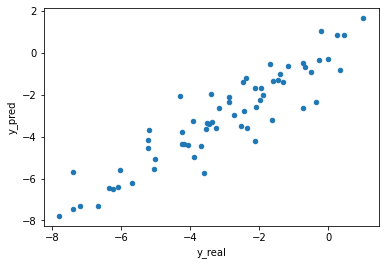

In [ ]:
df.plot(x="y_real", y="y_pred",kind='scatter')
